In [6]:
#homework 5 Statistics and ML Edward Vrijghem 

In [34]:
#exercise 3
set.seed(10)
x = cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))
x

1,4
1,3
0,4
5,1
6,2
4,0


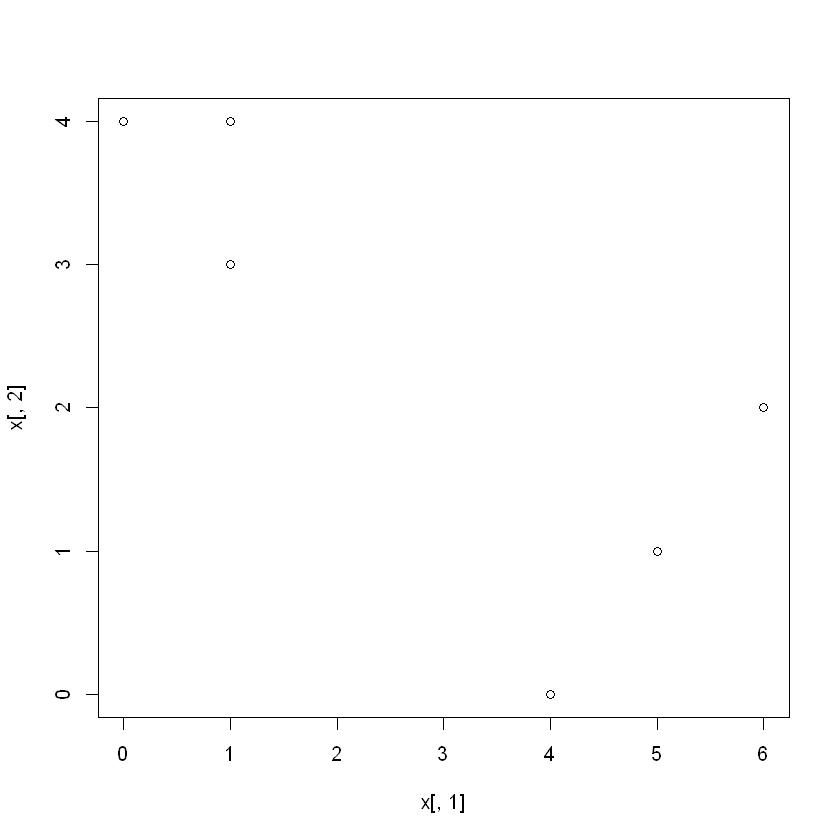

In [8]:
#exercise 3a
plot(x[,1], x[,2])

In [41]:
#exercise 3b
labels = sample(2, nrow(x), replace=T)
labels

[1] 1 1 2 2 2 1

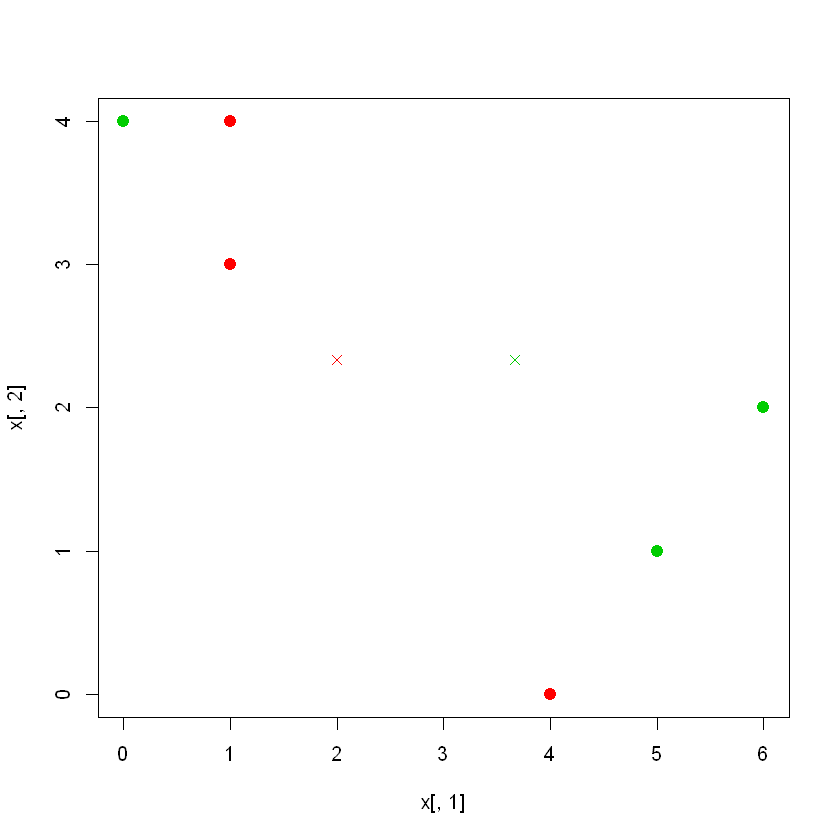

In [42]:
#exercise 3c
centroid1 <- c(mean(x[labels == 1, 1]), mean(x[labels == 1, 2]))
centroid2 <- c(mean(x[labels == 2, 1]), mean(x[labels == 2, 2]))
plot(x[,1], x[,2], col=(labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

In [43]:
centroid1

[1] 2.000000 2.333333

In [44]:
centroid2

[1] 3.666667 2.333333

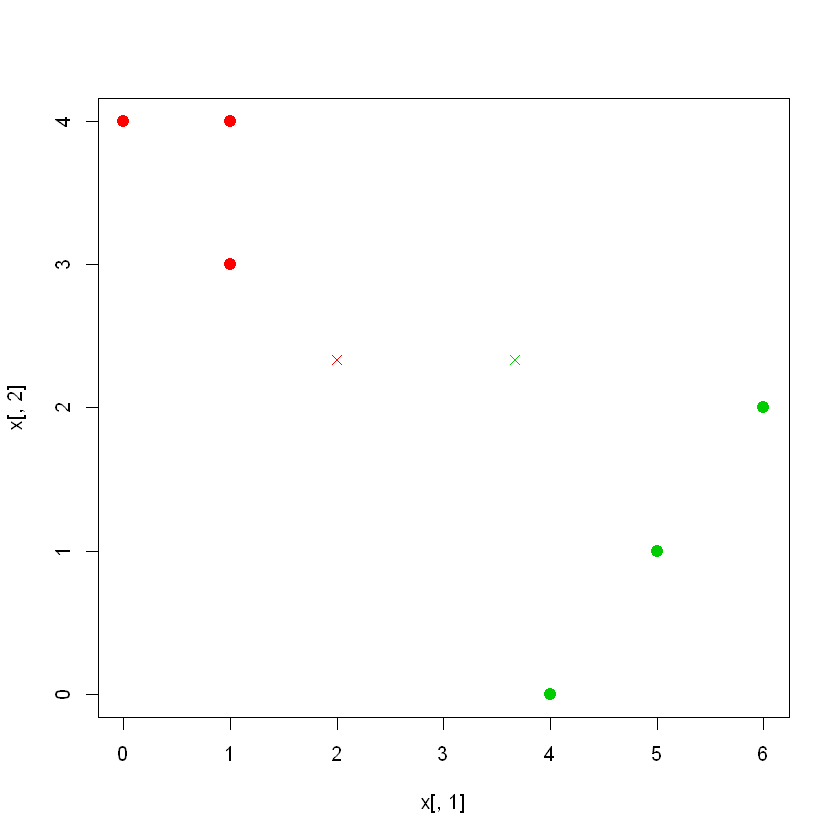

In [45]:
labels <- c(1, 1, 1, 2, 2, 2)
plot(x[, 1], x[, 2], col = (labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

In [46]:
#exercise 3d
euclid = function(a, b) {
  return(sqrt((a[1] - b[1])^2 + (a[2]-b[2])^2))
}
assign_labels = function(x, centroid1, centroid2) {
  labels = rep(NA, nrow(x))
  for (i in 1:nrow(x)) {
    if (euclid(x[i,], centroid1) < euclid(x[i,], centroid2)) {
      labels[i] = 1
    } else {
      labels[i] = 2
    }
  }
  return(labels)
}
labels = assign_labels(x, centroid1, centroid2)
labels


[1] 1 1 1 2 2 2

In [47]:
#exercise 3e
last_labels = rep(-1, 6)
while (!all(last_labels == labels)) {
  last_labels = labels
  centroid1 = c(mean(x[labels==1, 1]), mean(x[labels==1, 2]))
  centroid2 = c(mean(x[labels==2, 1]), mean(x[labels==2, 2]))
  print(centroid1)
  print(centroid2)
  labels = assign_labels(x, centroid1, centroid2)
}
labels

[1] 0.6666667 3.6666667
[1] 5 1


[1] 1 1 1 2 2 2

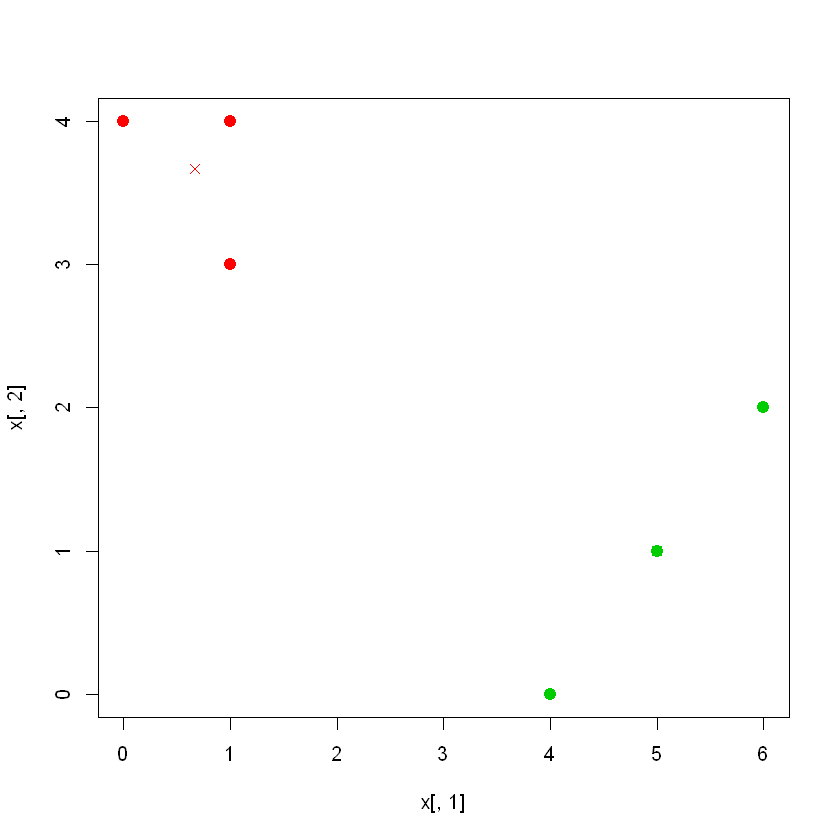

In [48]:
#exercise 3f
plot(x[,1], x[,2], col=(labels+1), pch=20, cex=2)
points(centroid1[1], centroid1[2], col=2, pch=4)
points(centroid2[1], centroid2[2], col=3, pch=4)

In [15]:
#exercise 8a
library(ISLR)
set.seed(1)

pr.out = prcomp(USArrests, center=T, scale=T)
pr.var = pr.out$sdev^2
pve = pr.var / sum(pr.var)
pve

Warning message:
"package 'ISLR' was built under R version 3.6.2"

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [16]:
#exercise 8b
loadings = pr.out$rotation
pve2 = rep(NA, 4)
dmean = apply(USArrests, 2, mean)
dsdev = sqrt(apply(USArrests, 2, var))
dsc = sweep(USArrests, MARGIN=2, dmean, "-")
dsc = sweep(dsc, MARGIN=2, dsdev, "/")
for (i in 1:4) {
  proto_x = sweep(dsc, MARGIN=2, loadings[,i], "*")
  pc_x = apply(proto_x, 1, sum)
  pve2[i] = sum(pc_x^2)
}
pve2 = pve2/sum(dsc^2)
pve2

[1] 0.62006039 0.24744129 0.08914080 0.04335752

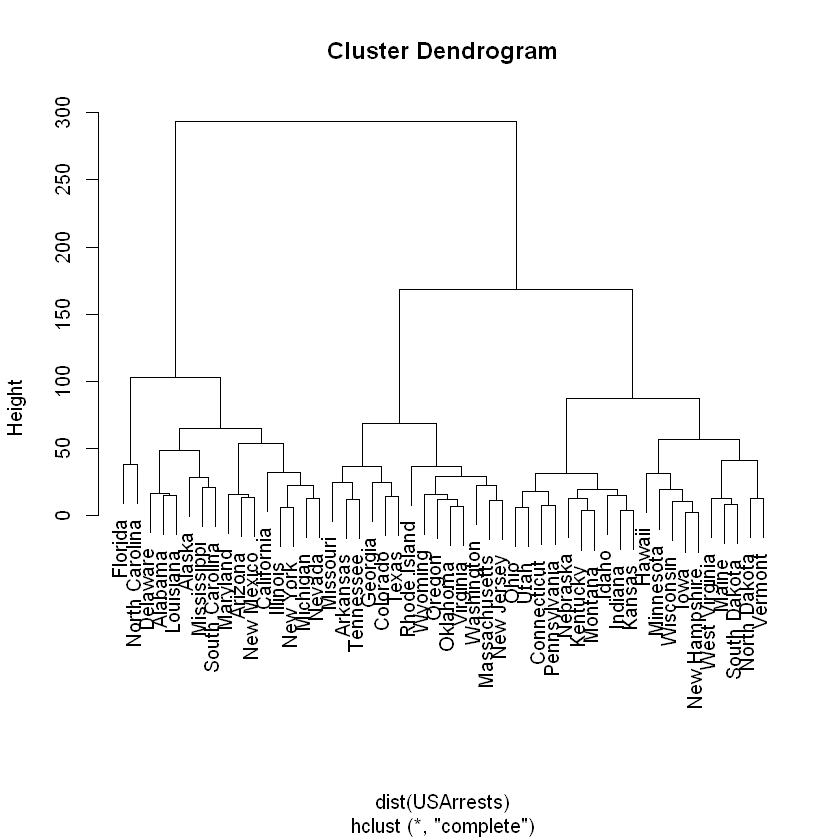

In [17]:
#exercise 9a
hc.complete = hclust(dist(USArrests), method="complete")
plot(hc.complete)

In [18]:
#exercise 9b
cutree(hc.complete, 3)
table(cutree(hc.complete, 3))

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2


 1  2  3 
16 14 20 

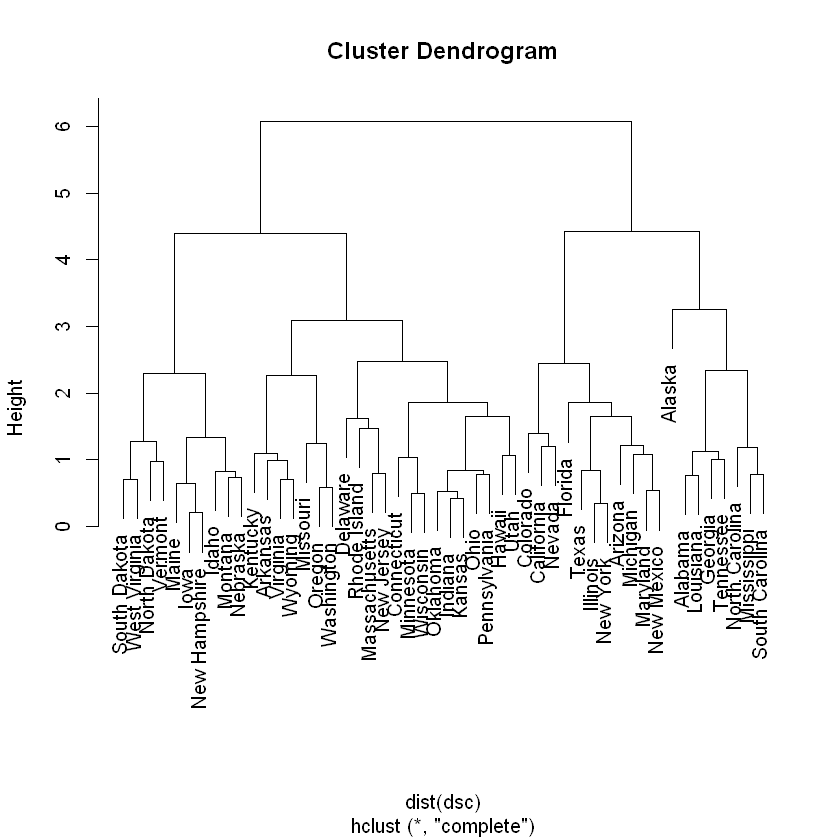

In [19]:
#exercise 9c
dsc = scale(USArrests)
hc.s.complete = hclust(dist(dsc), method="complete")
plot(hc.s.complete)

In [20]:
#exercise 9d
cutree(hc.s.complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [21]:
table(cutree(hc.s.complete, 3))


 1  2  3 
 8 11 31 

In [22]:
table(cutree(hc.s.complete, 3), cutree(hc.complete, 3))

   
     1  2  3
  1  6  2  0
  2  9  2  0
  3  1 10 20

In [23]:
#exercise 10a
set.seed(2)
x = matrix(rnorm(20*3*50, mean=0, sd=0.001), ncol=50)
x[1:20, 2] = 1
x[21:40, 1] = 2
x[21:40, 2] = 2
x[41:60, 1] = 1

In [24]:
#exercise 10b
pca.out = prcomp(x)
summary(pca.out)

Importance of components:
                         PC1    PC2      PC3      PC4      PC5      PC6
Standard deviation     1.008 0.5821 0.001731 0.001673 0.001648 0.001582
Proportion of Variance 0.750 0.2499 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.750 1.0000 0.999970 0.999970 0.999970 0.999970
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     0.001543 0.001497 0.001474 0.001411 0.001393 0.001335
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.999980 0.999980 0.999980 0.999980 0.999980 0.999980
                           PC13     PC14     PC15     PC16    PC17     PC18
Standard deviation     0.001297 0.001257 0.001244 0.001226 0.00116 0.001118
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.00000 0.000000
Cumulative Proportion  0.999980 0.999990 0.999990 0.999990 0.99999 0.999990
                           PC19     PC20     PC21      PC22      PC23     

In [25]:
pca.out$x[,1:2]

PC1,PC2
-0.7079228,-7.076535e-01
-0.7071573,-7.068897e-01
-0.7061651,-7.058937e-01
-0.7080866,-7.078204e-01
-0.7073449,-7.070720e-01
-0.7071940,-7.069282e-01
-0.7067857,-7.065196e-01
-0.7074565,-7.071901e-01
-0.7058831,-7.056148e-01
-0.7073860,-7.071167e-01


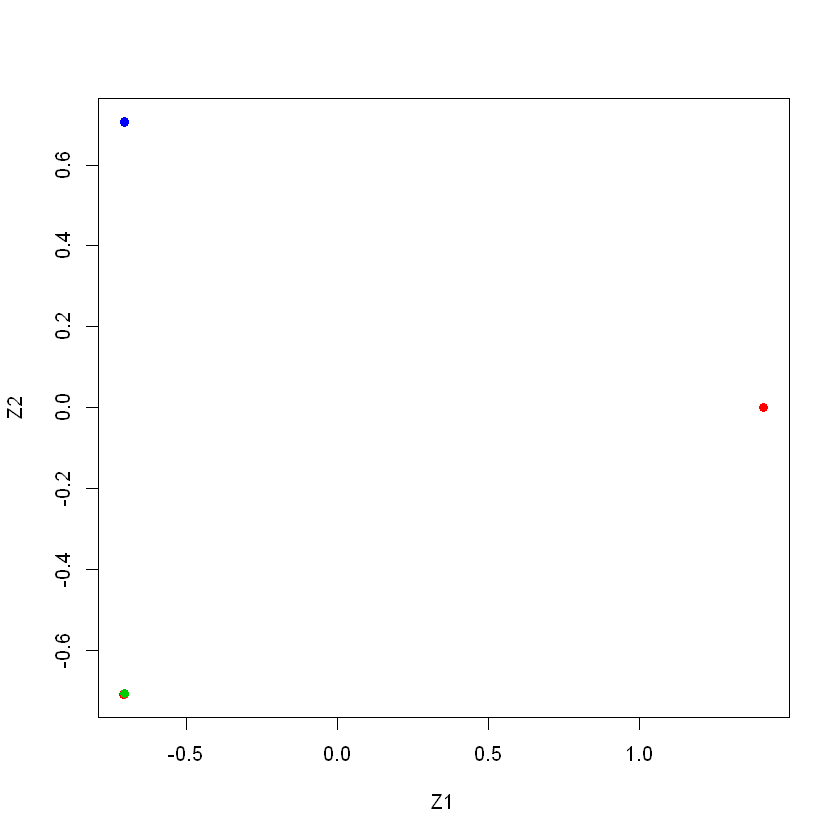

In [26]:
plot(pca.out$x[,1:2], col=2:4, xlab="Z1", ylab="Z2", pch=19) 

In [27]:
#exercise 10c
km.out = kmeans(x, 3, nstart=20)
table(km.out$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

   
     1  2  3
  1  0 20  0
  2  0  0 20
  3 20  0  0

In [28]:
#exercise 10d
km.out = kmeans(x, 2, nstart=20)
km.out$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [29]:
#exercise 10e
km.out = kmeans(x, 4, nstart=20)
km.out$cluster

[1] 1 1 1 1 1 2 1 2 1 1 2 2 2 2 1 2 1 2 2 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

In [30]:
#exercise 10f
km.out = kmeans(pca.out$x[,1:2], 3, nstart=20)
table(km.out$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

   
     1  2  3
  1  0  0 20
  2  0 20  0
  3 20  0  0

In [31]:
#exercise 10g
km.out = kmeans(scale(x), 3, nstart=20)
km.out$cluster

[1] 3 3 3 3 3 1 3 1 2 3 1 1 1 1 3 1 2 1 1 3 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 1 1 3 3 3 1 1 1 3 3 3 2 1 1 3 3 1 3 3 3 3